# Explore here

Datos sociodemográficos y de recursos de salud a nivel de condado de EE. UU. (2018-2019)
Se han recopilado datos sociodemográficos y de recursos de salud por condado en los Estados Unidos y queremos descubrir si existe alguna relación entre los recursos sanitarios y los datos sociodemográficos.

Para ello, es necesario que establezcas una variable objetivo (relacionada con la salud) para llevar a cabo el análisis.

In [36]:
# Your code here
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
import numpy as np
import pandas as pd

In [37]:
#Load data
raw_ds = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv", sep = ",")

In [38]:
# configuration for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.reset_option('all')

/tmp/ipykernel_35194/406830732.py:5: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option('all')
/tmp/ipykernel_35194/406830732.py:5: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


In [39]:
raw_ds.to_csv("../data/raw/raw_ds.csv", index = False)

In [40]:
raw_ds.shape

(3140, 108)

In [41]:
num_variables = raw_ds.shape[1]

print("Número de variables:", num_variables)

Número de variables: 108


In [42]:
raw_ds.describe()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,11.751535,...,5827.242357,13.073503,12.088089,14.053726,9326.577707,3.446242,3.207516,3.710478,2466.234076,4.635350
std,15150.559265,3.335834e+05,4.180730e+04,2.124081,4.228439e+04,1.815044,4.957773e+04,3.126297,4.899095e+04,1.696599,...,15720.551934,2.724351,2.622948,2.824828,29754.601185,0.568059,0.527740,0.613069,7730.422067,1.510447
min,1001.000000,8.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.100000e+01,6.092789,...,7.000000,6.100000,5.500000,6.700000,11.000000,1.800000,1.700000,1.900000,3.000000,1.000000
25%,18180.500000,1.096325e+04,1.280500e+03,10.594639,1.374500e+03,11.674504,1.263750e+03,10.496774,1.232750e+03,10.689322,...,815.000000,11.200000,10.300000,12.100000,1187.750000,3.100000,2.900000,3.300000,314.750000,3.000000
50%,29178.000000,2.580050e+04,3.057000e+03,11.802727,3.274000e+03,12.687422,3.108000e+03,11.772649,3.000500e+03,11.580861,...,1963.500000,12.800000,11.800000,13.800000,2743.000000,3.400000,3.200000,3.700000,718.000000,5.000000
75%,45081.500000,6.791300e+04,8.097000e+03,12.951840,8.822250e+03,13.659282,8.976250e+03,13.182260,8.314250e+03,12.639379,...,4727.000000,14.800000,13.700000,15.900000,6679.250000,3.800000,3.500000,4.100000,1776.250000,6.000000
max,56045.000000,1.010552e+07,1.208253e+06,25.460677,1.239139e+06,23.304372,1.557073e+06,37.570198,1.501844e+06,22.225129,...,434075.000000,25.600000,24.200000,27.000000,952335.000000,6.200000,5.800000,6.600000,237766.000000,6.000000


The DataFrame contains 3140 records (rows) and 108 variables (columns).

In [43]:
# Obtener información sobre tipos de datos y valores no nulos
raw_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [44]:
for colunm in raw_ds:
    print(raw_ds.isnull().sum())


fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64
fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64
fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int6

In [45]:
duplicados=raw_ds.duplicated().sum()
duplicados

0

In [46]:
#Seeing the data
raw_ds

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


In [47]:
raw_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


#Target 'anycondition_prevalence'

In [48]:
for colunm in raw_ds:
    print(colunm)

fips
TOT_POP
0-9
0-9 y/o % of total pop
19-Oct
10-19 y/o % of total pop
20-29
20-29 y/o % of total pop
30-39
30-39 y/o % of total pop
40-49
40-49 y/o % of total pop
50-59
50-59 y/o % of total pop
60-69
60-69 y/o % of total pop
70-79
70-79 y/o % of total pop
80+
80+ y/o % of total pop
White-alone pop
% White-alone
Black-alone pop
% Black-alone
Native American/American Indian-alone pop
% NA/AI-alone
Asian-alone pop
% Asian-alone
Hawaiian/Pacific Islander-alone pop
% Hawaiian/PI-alone
Two or more races pop
% Two or more races
POP_ESTIMATE_2018
N_POP_CHG_2018
GQ_ESTIMATES_2018
R_birth_2018
R_death_2018
R_NATURAL_INC_2018
R_INTERNATIONAL_MIG_2018
R_DOMESTIC_MIG_2018
R_NET_MIG_2018
Less than a high school diploma 2014-18
High school diploma only 2014-18
Some college or associate's degree 2014-18
Bachelor's degree or higher 2014-18
Percent of adults with less than a high school diploma 2014-18
Percent of adults with a high school diploma only 2014-18
Percent of adults completing some college 

In [49]:
raw_ds.describe()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,11.751535,...,5827.242357,13.073503,12.088089,14.053726,9326.577707,3.446242,3.207516,3.710478,2466.234076,4.635350
std,15150.559265,3.335834e+05,4.180730e+04,2.124081,4.228439e+04,1.815044,4.957773e+04,3.126297,4.899095e+04,1.696599,...,15720.551934,2.724351,2.622948,2.824828,29754.601185,0.568059,0.527740,0.613069,7730.422067,1.510447
min,1001.000000,8.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.100000e+01,6.092789,...,7.000000,6.100000,5.500000,6.700000,11.000000,1.800000,1.700000,1.900000,3.000000,1.000000
25%,18180.500000,1.096325e+04,1.280500e+03,10.594639,1.374500e+03,11.674504,1.263750e+03,10.496774,1.232750e+03,10.689322,...,815.000000,11.200000,10.300000,12.100000,1187.750000,3.100000,2.900000,3.300000,314.750000,3.000000
50%,29178.000000,2.580050e+04,3.057000e+03,11.802727,3.274000e+03,12.687422,3.108000e+03,11.772649,3.000500e+03,11.580861,...,1963.500000,12.800000,11.800000,13.800000,2743.000000,3.400000,3.200000,3.700000,718.000000,5.000000
75%,45081.500000,6.791300e+04,8.097000e+03,12.951840,8.822250e+03,13.659282,8.976250e+03,13.182260,8.314250e+03,12.639379,...,4727.000000,14.800000,13.700000,15.900000,6679.250000,3.800000,3.500000,4.100000,1776.250000,6.000000
max,56045.000000,1.010552e+07,1.208253e+06,25.460677,1.239139e+06,23.304372,1.557073e+06,37.570198,1.501844e+06,22.225129,...,434075.000000,25.600000,24.200000,27.000000,952335.000000,6.200000,5.800000,6.600000,237766.000000,6.000000


In [50]:
# Paso 1: Identificar columnas categóricas
columnas_categoricas = raw_ds.select_dtypes(include=['object']).columns
columnas_categoricas


Index(['COUNTY_NAME', 'STATE_NAME'], dtype='object')

In [51]:
#factorize
raw_ds["COUNTY_NAME"] = pd.factorize(raw_ds["COUNTY_NAME"])[0]
raw_ds["STATE_NAME"] = pd.factorize(raw_ds["STATE_NAME"])[0]

raw_ds.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [52]:
numeric_columns = raw_ds.select_dtypes(include=['int', 'float']).columns.tolist()

In [53]:
print(len(numeric_columns))

108


In [54]:
raw_ds.describe()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,11.751535,...,5827.242357,13.073503,12.088089,14.053726,9326.577707,3.446242,3.207516,3.710478,2466.234076,4.635350
std,15150.559265,3.335834e+05,4.180730e+04,2.124081,4.228439e+04,1.815044,4.957773e+04,3.126297,4.899095e+04,1.696599,...,15720.551934,2.724351,2.622948,2.824828,29754.601185,0.568059,0.527740,0.613069,7730.422067,1.510447
min,1001.000000,8.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.100000e+01,6.092789,...,7.000000,6.100000,5.500000,6.700000,11.000000,1.800000,1.700000,1.900000,3.000000,1.000000
25%,18180.500000,1.096325e+04,1.280500e+03,10.594639,1.374500e+03,11.674504,1.263750e+03,10.496774,1.232750e+03,10.689322,...,815.000000,11.200000,10.300000,12.100000,1187.750000,3.100000,2.900000,3.300000,314.750000,3.000000
50%,29178.000000,2.580050e+04,3.057000e+03,11.802727,3.274000e+03,12.687422,3.108000e+03,11.772649,3.000500e+03,11.580861,...,1963.500000,12.800000,11.800000,13.800000,2743.000000,3.400000,3.200000,3.700000,718.000000,5.000000
75%,45081.500000,6.791300e+04,8.097000e+03,12.951840,8.822250e+03,13.659282,8.976250e+03,13.182260,8.314250e+03,12.639379,...,4727.000000,14.800000,13.700000,15.900000,6679.250000,3.800000,3.500000,4.100000,1776.250000,6.000000
max,56045.000000,1.010552e+07,1.208253e+06,25.460677,1.239139e+06,23.304372,1.557073e+06,37.570198,1.501844e+06,22.225129,...,434075.000000,25.600000,24.200000,27.000000,952335.000000,6.200000,5.800000,6.600000,237766.000000,6.000000


el codigo funciona, ahora tenemos todas variables numericas

In [55]:
raw_ds["Heart disease_number"]

0        3345
1       13414
2        2159
3        1533
4        4101
        ...  
3135     1862
3136      981
3137     1034
3138      500
3139      471
Name: Heart disease_number, Length: 3140, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split

# Dividimos el conjunto de datos en muestras de train y test
numeric_columns.remove("Heart disease_number")

X = raw_ds.drop("Heart disease_number", axis=1)[numeric_columns]
y = raw_ds["Heart disease_number"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.head()


,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
1292,26127,26625,3221,12.097653,3463,13.006573,2922,10.974648,2829,10.625352,...,2314,13.7,12.6,14.9,2823,3.8,3.5,4.1,771,6
2302,42121,51266,5272,10.283619,5751,11.217961,5137,10.020286,5341,10.418211,...,4097,13.1,11.9,14.2,5416,3.5,3.2,3.8,1454,5
761,18133,37779,3915,10.362900,5118,13.547209,6202,16.416528,4363,11.548744,...,2792,12.2,11.2,13.1,3698,2.9,2.7,3.1,871,2
2194,40131,91984,11163,12.135806,12646,13.748043,11595,12.605453,11357,12.346712,...,5716,11.2,10.4,12.0,7913,3.0,2.8,3.2,2118,3
1241,26025,134487,16698,12.416070,17666,13.135842,17281,12.849569,15993,11.891856,...,10002,12.5,11.7,13.4,12987,3.4,3.2,3.6,3490,4


In [57]:
X_test.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
2893,51159,9038,812,8.984289,903,9.991148,1107,12.248285,1251,13.841558,...,734,14.8,14.0,15.6,1107,3.9,3.7,4.2,293,6
2968,53035,269805,30843,11.431589,29948,11.099868,41468,15.369619,36139,13.394489,...,12803,10.1,9.4,11.0,21777,2.8,2.6,3.0,5976,3
1064,21147,17408,2076,11.925551,2129,12.230009,2244,12.890625,2419,13.895910,...,2289,19.1,18.0,20.2,2604,4.4,4.0,4.7,594,6
1231,26005,117327,15179,12.937346,15892,13.545049,13545,11.544657,14075,11.996386,...,7975,10.6,9.6,11.5,9428,3.0,2.8,3.2,2639,5
2987,53073,225685,24496,10.854067,27050,11.985732,40511,17.950240,28415,12.590558,...,11009,9.3,8.6,10.1,16961,2.8,2.6,3.0,5054,4


NORMALIZACION

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)



X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = numeric_columns)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = numeric_columns)

X_train_norm.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
1292,-0.301633,-0.229763,-0.225393,0.102383,-0.231350,0.162374,-0.229775,-0.429454,-0.223780,-0.665485,...,-0.222477,0.244361,0.209312,0.314479,-0.215940,0.644725,0.576430,0.657452,-0.216950,0.910528
2302,0.761573,-0.161280,-0.179851,-0.754597,-0.181109,-0.836073,-0.188375,-0.736296,-0.176225,-0.785934,...,-0.117073,0.021661,-0.060621,0.064137,-0.135257,0.109985,0.000382,0.161947,-0.135212,0.249092
761,-0.833037,-0.198764,-0.209983,-0.717144,-0.195009,0.464170,-0.168470,1.320194,-0.194740,-0.128551,...,-0.194220,-0.312388,-0.330555,-0.329256,-0.188714,-0.959495,-0.959698,-0.994232,-0.204982,-1.735217
2194,0.629287,-0.048115,-0.049041,0.120407,-0.029705,0.576280,-0.067671,0.094875,-0.062335,0.335452,...,-0.021363,-0.683554,-0.639050,-0.722650,-0.057561,-0.781249,-0.767682,-0.829064,-0.055748,-1.073780
1241,-0.308413,0.070012,0.073864,0.252809,0.080526,0.234535,0.038603,0.173362,0.025430,0.070962,...,0.232009,-0.201038,-0.137745,-0.221967,0.100319,-0.068262,0.000382,-0.168390,0.108446,-0.412344


In [59]:

X_train_norm_Nout=X_train_norm.copy()
X_test_norm_Nout=X_test_norm.copy()

X_test_norm_Nout.to_csv("../data/raw/X_test_norm_Nout.csv", index = False)
X_train_norm_Nout.to_csv("../data/raw/X_train_norm_Nou.csv", index = False)

In [60]:
from pickle import dump
 
dump(scaler, open("../data/processed/normalizer.sav", "wb"))

In [61]:
# Feature selection
from sklearn.feature_selection import f_classif, SelectKBest

X_train_norm_Nout, X_test_norm_Nout, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 44)

selection_model = SelectKBest(f_classif, k = 30)
selection_model.fit(X_train_norm_Nout, y_train)

selected_columns = X_train_norm_Nout.columns[selection_model.get_support()]
X_train_sel_S_N = pd.DataFrame(selection_model.transform(X_train_norm_Nout), columns = selected_columns)
X_test_sel_S_N = pd.DataFrame(selection_model.transform(X_test_norm_Nout), columns = selected_columns)

X_train_sel_S_N.head()

,TOT_POP,0-9,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,...,Family Medicine/General Practice Primary Care (2019),ICU Beds_x,Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,COPD_number,diabetes_number,CKD_number
0,73952.0,6873.0,8337.0,8468.0,9269.0,10934.0,11010.0,6855.0,4522.0,70584.0,...,41.598166,14.0,75619.0,21498.0,60728.0,31878.0,22652.0,5915.0,7728.0,2100.0
1,1918.0,241.0,174.0,207.0,170.0,231.0,301.0,199.0,144.0,1787.0,...,1.176147,0.0,2084.0,605.0,1469.0,705.0,517.0,124.0,193.0,58.0
2,46051.0,6398.0,4804.0,5864.0,5299.0,6415.0,5775.0,3387.0,1850.0,43329.0,...,25.950170,0.0,45303.0,10280.0,34358.0,14746.0,12025.0,2470.0,3461.0,1052.0
3,3319.0,348.0,394.0,324.0,305.0,396.0,487.0,351.0,203.0,3016.0,...,1.111504,0.0,3433.0,1073.0,2665.0,1278.0,930.0,242.0,362.0,97.0
4,79074.0,8415.0,8487.0,8664.0,9124.0,12352.0,11580.0,6778.0,4168.0,74215.0,...,44.558939,16.0,79680.0,20684.0,62814.0,26362.0,22048.0,4626.0,6547.0,2000.0


In [62]:
X_test_sel_S_N.head()

,TOT_POP,0-9,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,...,Family Medicine/General Practice Primary Care (2019),ICU Beds_x,Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,COPD_number,diabetes_number,CKD_number
0,127068.0,21555.0,29039.0,15108.0,12509.0,9690.0,8609.0,5123.0,2896.0,117847.0,...,42.287598,14.0,120288.0,15104.0,88557.0,27268.0,22493.0,3957.0,6293.0,1996.0
1,34709.0,5654.0,3657.0,3569.0,3700.0,4565.0,4156.0,2368.0,1616.0,33722.0,...,19.558846,0.0,34513.0,7761.0,24486.0,10648.0,9109.0,2113.0,2721.0,824.0
2,28248.0,3291.0,4298.0,5101.0,3534.0,3233.0,2714.0,1604.0,982.0,11415.0,...,10.375940,0.0,27496.0,4778.0,22041.0,12530.0,9852.0,2228.0,3684.0,873.0
3,590925.0,83544.0,71522.0,79438.0,80916.0,77358.0,61451.0,35047.0,15025.0,521266.0,...,197.895679,97.0,535187.0,96577.0,435191.0,177437.0,147965.0,27802.0,46565.0,11942.0
4,3023.0,317.0,281.0,272.0,295.0,432.0,503.0,354.0,245.0,2948.0,...,1.974314,0.0,3019.0,1067.0,2437.0,1077.0,877.0,209.0,313.0,90.0


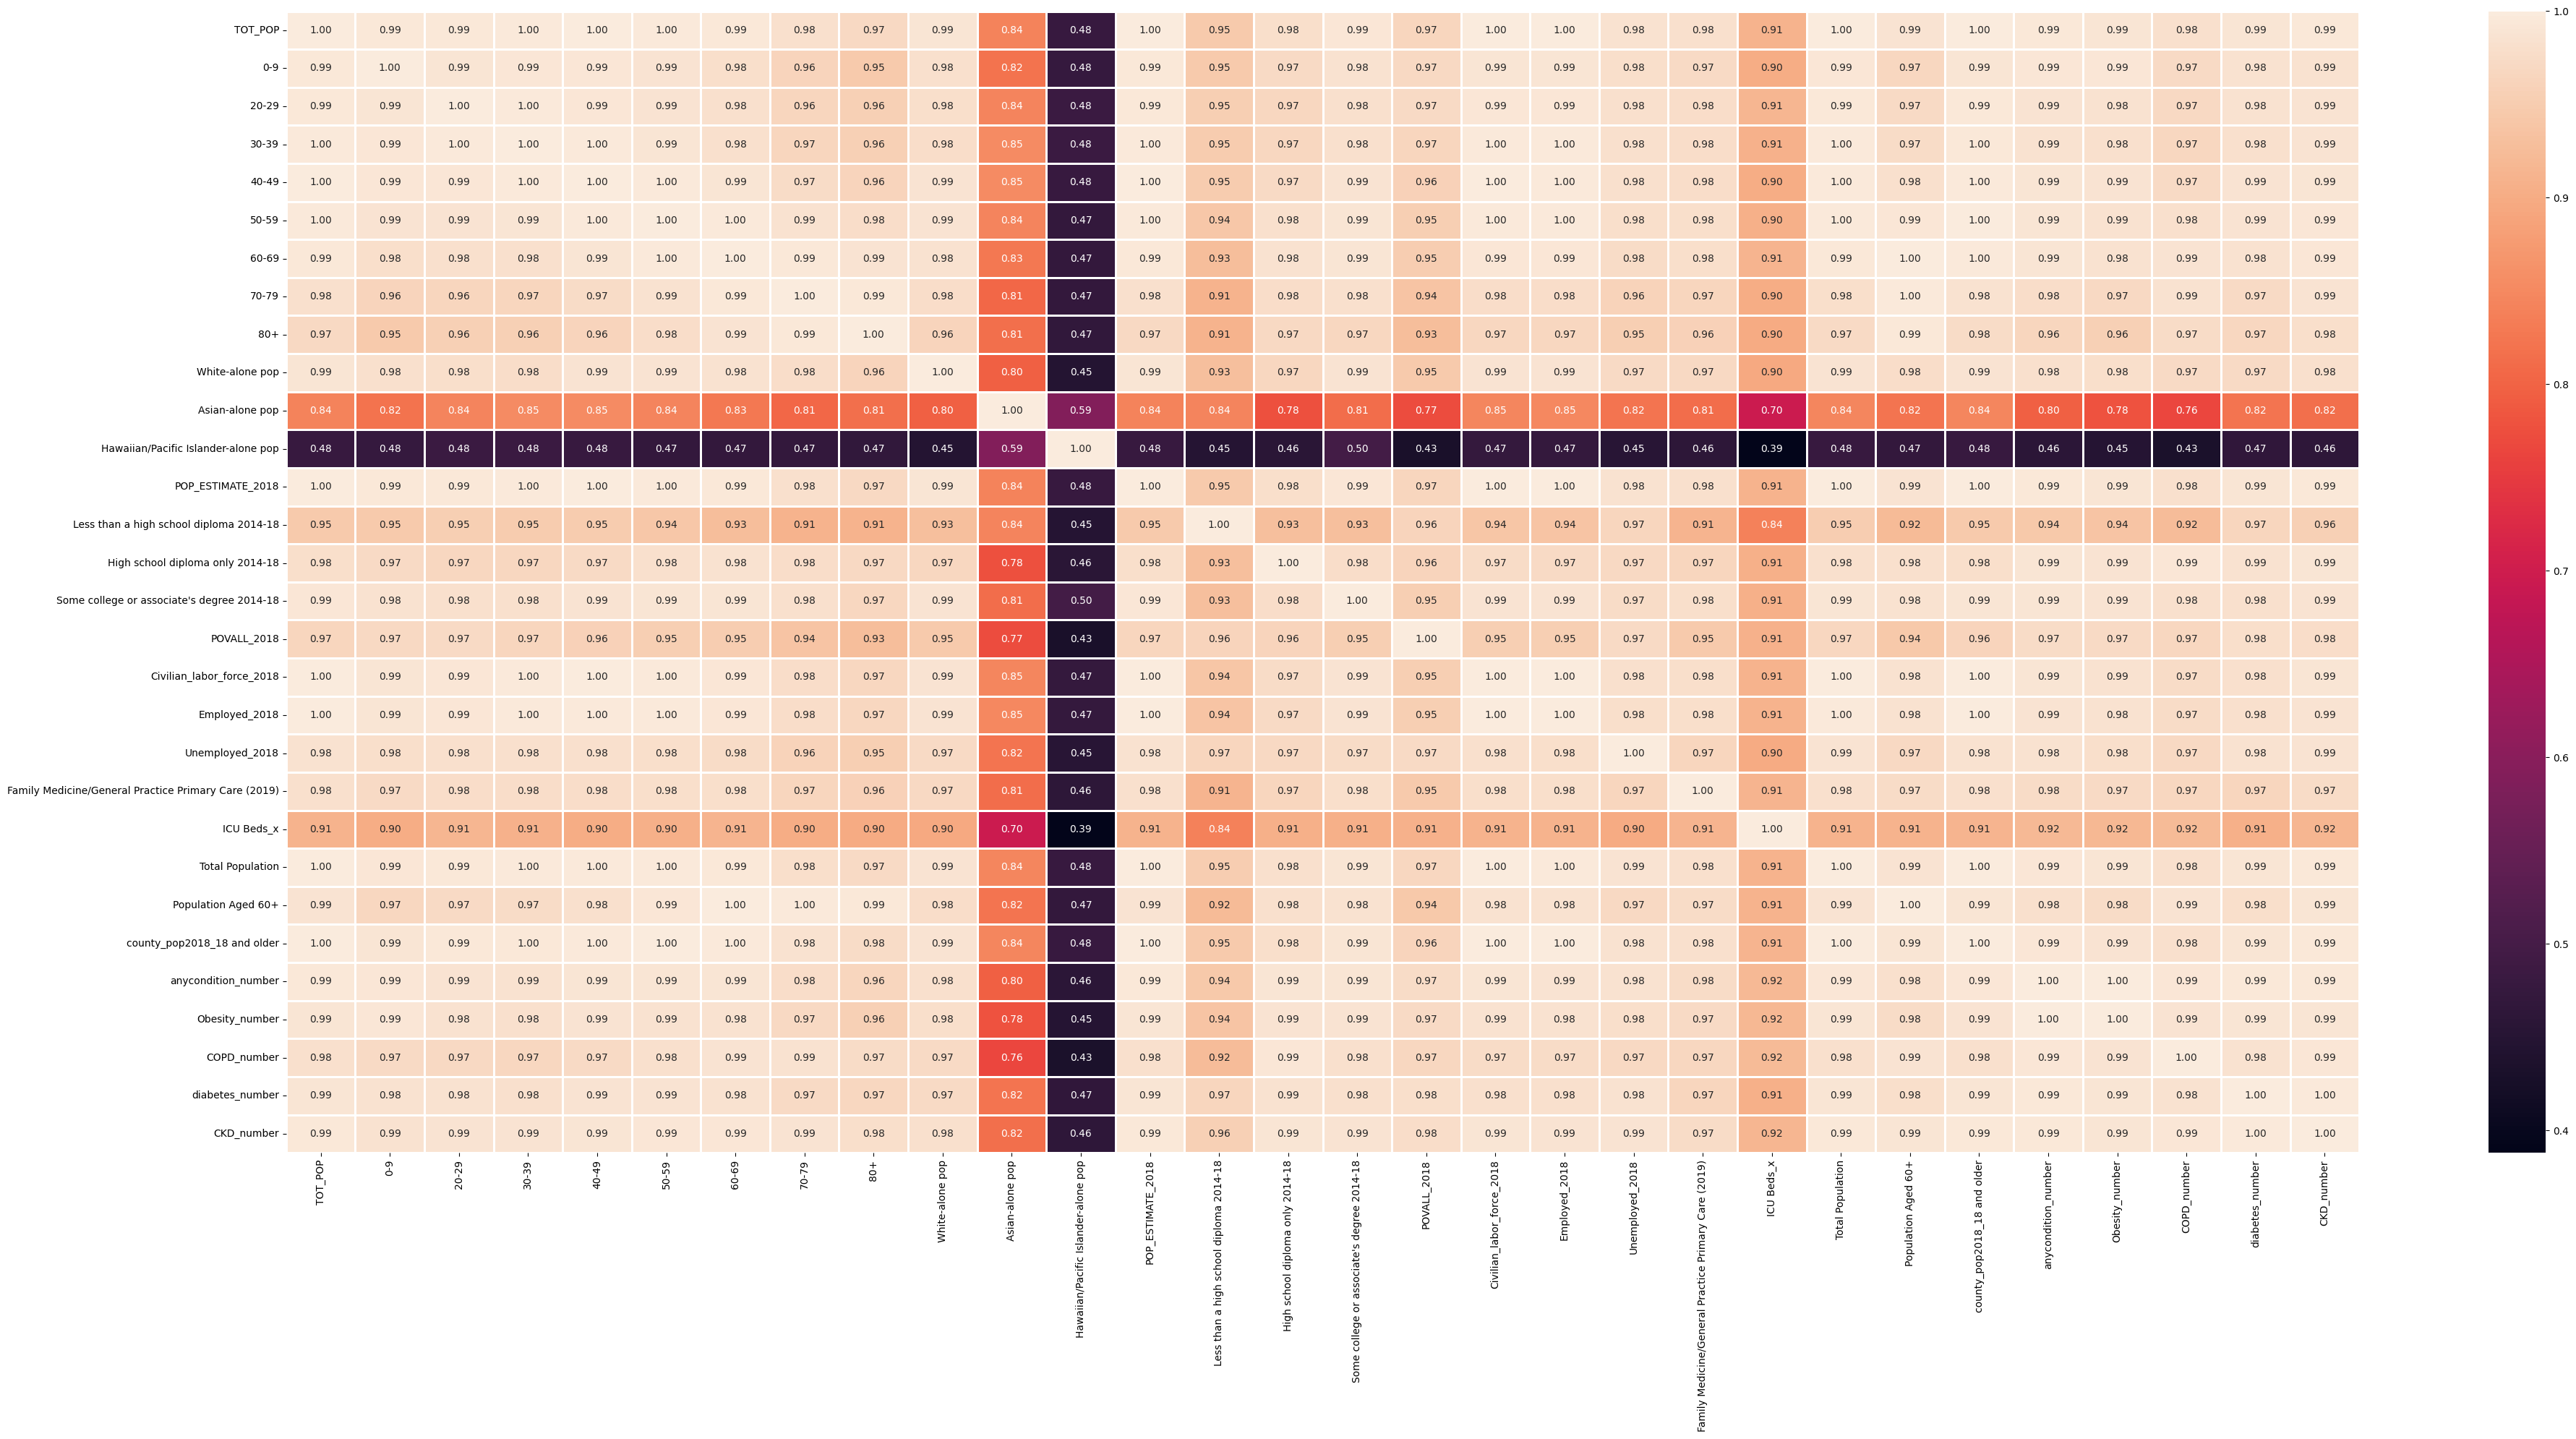

In [70]:
#correlacion





# Seleccionar las columnas deseadas del DataFrame raw_ds
selected_data = raw_ds[selected_columns]

# Calcular la correlación entre las columnas seleccionadas
correlation_matrix = selected_data.corr()

# Visualizar la matriz de correlación usando un heatmap
fig, axis = plt.subplots(figsize=(40,20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linecolor='white', linewidths=1)
plt.tight_layout()
plt.show()